In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters for GBM
dt = 1/252
S_0 = 11510.46 #Price of SMI at 6 Aug 2024
inital_price = 11130.44
r = 0.01
Nsim = 1000
N = 258 #Number of business days from 6 Aug 2024 to 18 Aug 2025
sigma = 0.136

In [16]:
def GBM(sigma, N,  S_0 = 11130.44, r = 0.01 , Nsim = 10000):
    # Create a 2D array to store the stock prices for each simulation
    S = np.zeros([Nsim,N])
    S[:,0] = S_0

    for i in range(Nsim):
        for j in range(N-1):
            Z = np.random.normal(0, 1)      
            # Calculate the stock price at time t+1 using the Geometric Brownian Motion model with risk-free interet rate
            S[i,j+1] = S[i,j] * np.exp( (r - 0.5 * sigma ** 2) * dt + sigma * Z * np.sqrt(dt) )
    return S

def payoff(price_path, barrier_price = 6566.9596, initial_price = 11130.44):
    barrier_hit = min(price_path) <= barrier_price
    asset_final_price = price_path[-1]

    if barrier_hit:
        return 1000 * (asset_final_price / initial_price)
    else:
        return 1000 * max(1, 1 + 1.25 * (asset_final_price / initial_price - 1))

# Payoff for a given set of simulations
def payoff_sim(S, barrier_price = 6566.9596, initial_price = 11130.44):
    num_simulations = S.shape[0]
    payoff_values = np.zeros(num_simulations)
    for i in range(num_simulations):
        # Need to discount the payoff to present value
        payoff_values[i] = math.exp(-r*N*dt) * payoff(S[i,:], barrier_price, initial_price)
    return payoff_values


In [49]:
'''
# T8.2.f ====
N1 = 100
SimHSIPre = SimGBMExact(N1, St, v, sigma, dt, Tminust)
SimNotesPre = exp(-r * Tminust) * apply(SimHSIPre, 1, NotePayoff)
c = -cov(SimNotesPre, SimHSIPre[, ncol(SimHSIPre)])/
  (St^2 * exp(2 * r * Tminust) * (exp(sigma^2 * Tminust) - 1))
SimHSICV = SimGBMExact(Nsim, St, v, sigma, dt, Tminust)
SimNotesCV = exp(-r * Tminust) * apply(SimHSICV, 1, NotePayoff) +
  c * (SimHSICV[, ncol(SimHSICV)] - St * exp(r * Tminust))

NoteCVValue = mean(SimNotesCV); NoteCVValueVar = var(SimNotesCV) / Nsim
'''

first_N = 100
S_first_N = GBM(sigma, first_N)
derivative_price_first_N = payoff_sim(S_first_N)

c = -np.cov(derivative_price_first_N, S_first_N[:,-1])[0][1] / (S_0 ** 2 * np.exp(2 * r * N * dt) * (np.exp(sigma ** 2 * N * dt) - 1))
print(c)

actual_sim_N  = 10000
S_N2 = GBM(sigma, N, Nsim = actual_sim_N)
derivative_price_N2= payoff_sim(S_N2)
derivative_price_actual_sim_N_CV = derivative_price_N2 + c * (S_N2[:,-1] - [S_0 * np.exp(r * N * dt) for _ in range(actual_sim_N)] )
print(derivative_price_actual_sim_N_CV.mean())

-0.02114120007212929
1072.6773315729115


Text(0.5, 1.0, 'Stock price simulation using Geometric Brownian Motion with CV for 5 Aug')

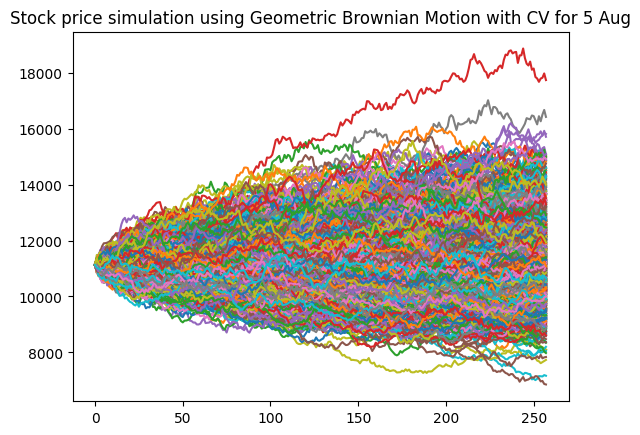

In [52]:
t = range(N)
for i in range(Nsim):
    plt.plot(t, S_N2[i])
plt.title('Stock price simulation using Geometric Brownian Motion with CV for 5 Aug')